<a href="https://colab.research.google.com/github/belyakovmy/pet-projects/blob/main/ABC_XYZ_%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Об ABC-XYZ анализе  

&nbsp;&nbsp;&nbsp;ABC-XYZ анализ — это метод классификации ресурсов (товаров, клиентов, поставщиков) на основе двух критериев:

- ABC — по степени важности (вклад в прибыль/оборот).  
- XYZ — по стабильности спроса/потребления.

Этот подход помогает компаниям оптимизировать:  
* управление запасами,
* ассортиментную политику,
* логистику и закупки,
* работу с клиентами и поставщиками.

Комбинируя оба метода, получаем 9 групп. Они позволяет понять, какие товары самые ценные для компании, а какие показывают худшие результаты, и использовать разные стратегии.

###ABC-анализ
ABC-анализ — классификация объектов по влиянию на прибыль компании. Например, разделение товаров на группы по объёму выручки, которую они приносят. В основе метода лежит принцип Парето: 20% усилий приносят 80% результата.  
Объекты анализа делят на три группы:


|Группа|Доля в ассортименте|Доля в выручке|Характеристика|
|-|-|-|-|
|A|10–20%|70–80%|Наиболее ценные позиции|
|B|20–30%|15–20%|Средняя значимость|
|C|50–70%|5–10%|Наименее значимые|

Рекомендации:
* Группа A: приоритетный контроль, страховой запас, индивидуальные закупки.

* Группа B:  запасают в таком количестве, чтобы покрыть спрос.

* Группа C: возможен вывод из ассортимента или заказ под запрос.
<br><br>

###XYZ-анализ
XYZ-анализ — классификация объектов по частоте использования. Например, разделение товаров на группы по колебанию спроса на них. Оценить это позволяет коэффициент вариации (*CV* ) — эта метрика показывает, насколько показатели отклоняются от среднего значения.

Формула:
$$
CV = \frac{\sigma}{\mu} * 100\%,  
$$
где:  
&nbsp; σ — стандартное отклонение,  
&nbsp; μ — среднее значение.
<br><br>

|Группа|CV (коэф. вариации)|Характеристика|
|-|-|-|
|X|≤ 10%|Стабильный спрос|
|Y|10–25%|Колеблющийся спрос|
|Z|> 25%|Нерегулярный/сложнопрогнозируемый|

Рекомендации:
* Группа X: всегда должны быть в наличии на складе. За ними приходит большинство покупателей.
* Группа Y: использовать гибкие схемы пополнения (например, динамический заказ).
* Группа Z: закупать только под заказ или держать минимальный запас.


##Структура базы данных
Этот набор данных содержит записил о продажах шоколада:
* *Sales Person:* имя продавца, сделавшего заказ.
* *Country:* регион продажи или местоположение магазина.
*	*Product:* название товара.
*	*Date:* дата заказа.
*	*Amount:* доход от продажи
*	*Boxes Shipped:* количество коробок в заказе



## Цель исследования
Сегментировать клиентов, чтобы выявить наиболее ценных и перспективных их них. К сожалению, в наборе данных нет выручки, поэтому будем использовать доход от клиентов, объем и стабильность их заказов.




###ABC-анализ

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
url = 'https://raw.githubusercontent.com/belyakovmy/pet-projects/refs/heads/main/datasets/ChocolateSales.csv'
data = pd.read_csv(url)

In [ ]:
data.head()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04-Jan-22,"$5,320",180
1,Van Tuxwell,India,85% Dark Bars,01-Aug-22,"$7,896",94
2,Gigi Bohling,India,Peanut Butter Cubes,07-Jul-22,"$4,501",91
3,Jan Morforth,Australia,Peanut Butter Cubes,27-Apr-22,"$12,726",342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24-Feb-22,"$13,685",184


In [ ]:
#для удобства изменю формат и название солбцов
data.columns = data.columns.str.lower().str.replace(' ', '_')

In [ ]:
data.rename(columns={'amount':'revenue',
                     'sales_person':'customer'},
             inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customer       1094 non-null   object
 1   country        1094 non-null   object
 2   product        1094 non-null   object
 3   date           1094 non-null   object
 4   revenue        1094 non-null   object
 5   boxes_shipped  1094 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 51.4+ KB


In [ ]:
data['revenue'] = data['revenue'].str.replace('[$,]', '', regex=True).astype('int64')

In [ ]:
data['date'] = pd.to_datetime(data['date'], format='%d-%b-%y')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   customer       1094 non-null   object        
 1   country        1094 non-null   object        
 2   product        1094 non-null   object        
 3   date           1094 non-null   datetime64[ns]
 4   revenue        1094 non-null   int64         
 5   boxes_shipped  1094 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 51.4+ KB


Есть информация о заказах с 03.01.2022 по 31.08.2022:

In [ ]:
data.describe()

,date,revenue,boxes_shipped
count,1094,1094.000000,1094.000000
mean,2022-05-03 09:04:56.160877568,5652.308044,161.797989
min,2022-01-03 00:00:00,7.000000,1.000000
25%,2022-03-02 00:00:00,2390.500000,70.000000
50%,2022-05-11 00:00:00,4868.500000,135.000000
75%,2022-07-04 00:00:00,8027.250000,228.750000
max,2022-08-31 00:00:00,22050.000000,709.000000
std,NaN,4102.442014,121.544145


В данных нет пропусков и дубликатов:

In [ ]:
data.isnull().sum()

,0
customer,0
country,0
product,0
date,0
revenue,0
boxes_shipped,0


In [ ]:
data.duplicated().sum()

np.int64(0)

In [ ]:
data.head()

,customer,country,product,date,revenue,boxes_shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,2022-01-04,5320,180
1,Van Tuxwell,India,85% Dark Bars,2022-08-01,7896,94
2,Gigi Bohling,India,Peanut Butter Cubes,2022-07-07,4501,91
3,Jan Morforth,Australia,Peanut Butter Cubes,2022-04-27,12726,342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,2022-02-24,13685,184


Сгруппировал данные по клиентам и посчитал объем заказов и выручку для каждого из них:

In [ ]:
df = data.groupby(['customer'])[['boxes_shipped', 'revenue']].sum()\
    .sort_values(by='revenue', ascending=False)\
    .rename(columns={'boxes_shipped':'order_volume'})\
    .reset_index()

In [ ]:
df.head()

,customer,order_volume,revenue
0,Ches Bonnell,7522,320901
1,Oby Sorrel,8608,316645
2,Madelene Upcott,7279,316099
3,Brien Boise,8102,312816
4,Kelci Walkden,8702,311710


In [ ]:
total_revenue = df['revenue'].sum()
total_order_volume = df['order_volume'].sum()

print(f'Общая выручка: ${total_revenue}\nОбщий объем заказов: {total_order_volume} шт.')

Общая выручка: $6183625
Общий объем заказов: 177007 шт.


In [ ]:
#функция для сегментирования клиентов
def abc_group(x):
  if x <= 0.8:
    return 'A'
  elif x <= 0.95:
    return 'B'
  else:
    return 'C'

Рассчитываю накопительную долю выручки и объема заказов для каждого клиента:

In [ ]:
df['cumulative_share_revenue'] = (df['revenue']/total_revenue).cumsum()

In [ ]:
df['abc_revenue'] = df['cumulative_share_revenue'].apply(abc_group)

In [ ]:
df.head()

,customer,order_volume,revenue,cumulative_share_revenue,abc_revenue
0,Ches Bonnell,7522,320901,0.051895,A
1,Oby Sorrel,8608,316645,0.103102,A
2,Madelene Upcott,7279,316099,0.154221,A
3,Brien Boise,8102,312816,0.204809,A
4,Kelci Walkden,8702,311710,0.255218,A


Было ожидание получить результат в соответствии с принципом Парето: 20% клиентов приносят 80% прибыли, но фактически получили: 72% клиентов обеспечили 80% дохода компании.  
Можно сказать, что у нас нет ярко выраженных VIP-клиентов.

In [ ]:
df['abc_revenue'].value_counts(normalize=True)

,proportion
abc_revenue,
A,0.72
B,0.20
C,0.08


Сегментируем клиентов по объему заказов:

In [ ]:
df.sort_values(by='order_volume', ascending=False, inplace=True)

In [ ]:
df.insert(loc=2, column='cumulative_share_volume', value=(df['order_volume']/total_order_volume).cumsum())

In [ ]:
df.insert(loc=3, column='abc_volume', value=df['cumulative_share_volume'].apply(abc_group))

Здесь тоже видно, что по объему заказов (abc_volume) преобладает сегмент А:

In [ ]:
df

,customer,order_volume,cumulative_share_volume,abc_volume,revenue,cumulative_share_revenue,abc_revenue
14,Karlen McCaffrey,9658,0.054563,A,223895,0.676458,A
7,Beverie Moffet,9214,0.106617,A,278922,0.396517,A
6,Dennison Crosswaite,8767,0.156146,A,291669,0.351410,A
4,Kelci Walkden,8702,0.205308,A,311710,0.255218,A
1,Oby Sorrel,8608,0.253939,A,316645,0.103102,A
3,Brien Boise,8102,0.299711,A,312816,0.204809,A
9,Marney O'Breen,8043,0.345150,A,259742,0.481618,A
16,Jan Morforth,7661,0.388431,A,219667,0.747718,A
0,Ches Bonnell,7522,0.430926,A,320901,0.051895,A
2,Madelene Upcott,7279,0.472049,A,316099,0.154221,A


In [ ]:
df['abc_volume'].value_counts(normalize=True)

,proportion
abc_volume,
A,0.72
B,0.16
C,0.12


In [ ]:
abc_table = df[['customer', 'abc_volume', 'abc_revenue']].reset_index(drop=True)

In [ ]:
abc_table.head()

,customer,abc_volume,abc_revenue
0,Karlen McCaffrey,A,A
1,Beverie Moffet,A,A
2,Dennison Crosswaite,A,A
3,Kelci Walkden,A,A
4,Oby Sorrel,A,A


*У нас есть 16 клиентов (А-А), которые приносят наибольшую прибыль и совершают заказы большего объема.*





In [ ]:
abc_table.groupby(['abc_revenue', 'abc_volume'])['customer'].count().reset_index()

,abc_revenue,abc_volume,customer
0,A,A,16
1,A,B,2
2,B,A,1
3,B,B,2
4,B,C,2
5,C,A,1
6,C,C,1


###XYZ-анализ

Классифицируем клиентов по стабильности спроса и прибыли с клиента:

In [ ]:
data['month'] = data['date'].dt.strftime('%Y-%m')

Группируем данные по клиентам и месяцам, считаем для каждого клиента объем заказов и прибыль

In [ ]:
customer_month = data.groupby(['customer', 'month'])[['boxes_shipped', 'revenue']].sum().reset_index()

In [ ]:
customer_month

,customer,month,boxes_shipped,revenue
0,Andria Kimpton,2022-01,769,33747
1,Andria Kimpton,2022-02,994,34685
2,Andria Kimpton,2022-03,618,18053
3,Andria Kimpton,2022-04,578,35602
4,Andria Kimpton,2022-05,792,25963
...,...,...,...,...
194,Wilone O'Kielt,2022-04,514,11382
195,Wilone O'Kielt,2022-05,175,10997
196,Wilone O'Kielt,2022-06,372,15869
197,Wilone O'Kielt,2022-07,588,21763


Посчитаем коэффициент вариации (отношение стандартного отклонения прибыли к средней прибыли каждого клиента). Он показывает, насколько сильно данные отклоняются от среднего:

In [ ]:
xyz_table = customer_month.groupby('customer').agg(
    CV_revenue = ('revenue', lambda x: x.std()/x.mean()),
    CV_order_volume = ('boxes_shipped', lambda x: x.std()/x.mean())
).reset_index()

In [ ]:
xyz_table.head()

,customer,CV_revenue,CV_order_volume
0,Andria Kimpton,0.489220,0.195262
1,Barr Faughny,0.206601,0.384444
2,Beverie Moffet,0.435359,0.348439
3,Brien Boise,0.548449,0.525123
4,Camilla Castle,0.449928,0.495704


In [ ]:
#функция для сегментации по xyz-группам
def xyz_group(x):
  if x <= 0.1:
    return 'X'
  elif x <= 0.25:
    return 'Y'
  else:
    return 'Z'

In [ ]:
xyz_table['xyz_revenue'] = xyz_table['CV_revenue'].apply(xyz_group)
xyz_table['xyz_order_volume'] = xyz_table['CV_order_volume'].apply(xyz_group)

In [ ]:
xyz_table

,customer,CV_revenue,CV_order_volume,xyz_revenue,xyz_order_volume
0,Andria Kimpton,0.489220,0.195262,Z,Y
1,Barr Faughny,0.206601,0.384444,Y,Z
2,Beverie Moffet,0.435359,0.348439,Z,Z
3,Brien Boise,0.548449,0.525123,Z,Z
4,Camilla Castle,0.449928,0.495704,Z,Z
5,Ches Bonnell,0.362922,0.275663,Z,Z
6,Curtice Advani,0.492569,0.388863,Z,Z
7,Dennison Crosswaite,0.365185,0.474078,Z,Z
8,Dotty Strutley,0.412045,0.588356,Z,Z
9,Gigi Bohling,0.513699,0.433597,Z,Z


При использовании традиционных границ CV для формирования групп: X: от 0 до 10%,  Y: от 10 до 25%, Z: более 25% мы получили сильный перекос в сторону группы Z — клиенты с непредсказуемым доходом и хаотичным спросом.


In [ ]:
xyz_table.groupby(['xyz_revenue', 'xyz_order_volume'])['customer'].count().reset_index()

,xyz_revenue,xyz_order_volume,customer
0,Y,Z,1
1,Z,Y,1
2,Z,Z,23


Из-за изменчивости данных стандартные границы делают сегментацию не очень информативной, поэтому используем другие пороги значений CV. Разделим параметр на три группы с равными интервалами по фиксированому шагу:

In [ ]:
#пример интервалов и количество значений в них
pd.cut(xyz_table['CV_revenue'], bins=3).value_counts(sort=False)

,count
CV_revenue,
"(0.206, 0.379]",4
"(0.379, 0.551]",18
"(0.551, 0.723]",3


In [ ]:
pd.cut(xyz_table['CV_order_volume'], bins=3).value_counts(sort=False)

,count
CV_order_volume,
"(0.194, 0.456]",9
"(0.456, 0.716]",14
"(0.716, 0.976]",2


In [ ]:
xyz_table['xyz_revenue_fix'] = pd.cut(xyz_table['CV_revenue'], bins=3, labels=['X', 'Y', 'Z']).astype('object')
xyz_table['xyz_order_volume_fix'] = pd.cut(xyz_table['CV_order_volume'], bins=3, labels=['X', 'Y', 'Z']).astype('object')

In [ ]:
xyz_table.head()

,customer,CV_revenue,CV_order_volume,xyz_revenue,xyz_order_volume,xyz_revenue_fix,xyz_order_volume_fix
0,Andria Kimpton,0.489220,0.195262,Z,Y,Y,X
1,Barr Faughny,0.206601,0.384444,Y,Z,X,X
2,Beverie Moffet,0.435359,0.348439,Z,Z,Y,X
3,Brien Boise,0.548449,0.525123,Z,Z,Y,Y
4,Camilla Castle,0.449928,0.495704,Z,Z,Y,Y


Уберу колонки с первоначальной сегментацией и оставлю последние:

In [ ]:
xyz_table.drop(columns=['xyz_revenue', 'xyz_order_volume'], inplace=True)

In [ ]:
xyz_table.rename(columns={'xyz_revenue_fix':'xyz_revenue', 'xyz_order_volume_fix':'xyz_order_volume'}, inplace=True)

In [ ]:
xyz_table = xyz_table[['customer', 'xyz_revenue', 'xyz_order_volume']]

*В итоге преобладает группа Y-Y с умеренными колебаниями в прибыли и объеме заказа: 11 клиентов.  
Также выделяется группа Y-X со средне стабильным доходом, но стабильно большими объемами заказов: 7 клиентов*

In [ ]:
xyz_table[['xyz_revenue', 'xyz_order_volume']].value_counts(sort=False).reset_index()

,xyz_revenue,xyz_order_volume,count
0,X,X,2
1,X,Y,2
2,Y,X,7
3,Y,Y,11
4,Z,Y,1
5,Z,Z,2


Соединим результаты двух анализов и рассмотрим их отдельно: по доходу и объемам заказа:

In [ ]:
merged_table = abc_table.merge(xyz_table, on='customer')

In [ ]:
merged_table.head()

,customer,abc_volume,abc_revenue,xyz_revenue,xyz_order_volume
0,Karlen McCaffrey,A,A,Y,Y
1,Beverie Moffet,A,A,Y,X
2,Dennison Crosswaite,A,A,X,Y
3,Kelci Walkden,A,A,Y,Y
4,Oby Sorrel,A,A,Y,Y


##Результаты

###По прибыли:

In [ ]:
abc_xyz_revenue = merged_table[['customer', 'abc_revenue', 'xyz_revenue']]

In [ ]:
abc_xyz_revenue['group'] = abc_xyz_revenue['abc_revenue'] + abc_xyz_revenue['xyz_revenue']

/tmp/ipython-input-52-2121401202.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  abc_xyz_revenue['group'] = abc_xyz_revenue['abc_revenue'] + abc_xyz_revenue['xyz_revenue']


In [ ]:
pd.pivot_table(
    data=abc_xyz_revenue,
    index='abc_revenue',
    columns='xyz_revenue',
    values='customer',
    aggfunc='count',
    fill_value=0
)

xyz_revenue,X,Y,Z
abc_revenue,,,
A,3,13,2
B,1,4,0
C,0,1,1


 * Группа AX (3 клиента): VIP-сегмент, дают высокую прибыль с минимальными колебаниями. Можем предложить эксклюзивные условия, персональные скидки.  
 * Группа AY (13 клиентов): приносят основной доход, но с колебаниями. Можем ввести программы лояльности (например, бонусы за регулярность заказа).
 * Группа AZ (2 клиента): приносят сущственную часть дохода, но спрос непредсказуем. Важно мониторить их активность (если пропадают, выяснять причины).
 * Группы BX (1 клиент),  BY (4 клиента): стабильные и с умеренными колебаниями середнячки. Стимулировать рост заказов.
 * Группы CY (1 клиент), CZ (1 клиент): приносят мало прибыли и плохо предсказуемые. Если ресурсы позволяют, то не отказываться от них, а попытаться растить.

###По объему заказов:

In [ ]:
abc_xyz_volume = merged_table[['customer', 'abc_volume', 'xyz_order_volume']]

In [ ]:
abc_xyz_volume['group'] = abc_xyz_volume['abc_volume'] + abc_xyz_volume['xyz_order_volume']

/tmp/ipython-input-55-557208272.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  abc_xyz_volume['group'] = abc_xyz_volume['abc_volume'] + abc_xyz_volume['xyz_order_volume']


In [ ]:
pd.pivot_table(
    data=abc_xyz_volume,
    index='abc_volume',
    columns='xyz_order_volume',
    values='customer',
    aggfunc='count',
    fill_value=0
)

xyz_order_volume,X,Y,Z
abc_volume,,,
A,6,11,1
B,3,1,0
C,0,2,1


* Группа AX (6 клиентов): большой объем заказов и они стабильные. Возможно, сможем улучшить их условия: персональный менеджер, программа лояльности.
* Группа AY (11 клиентов): самая крупная группа, создают большой объем продаж, но с нерегулряными колебаниями. Повод выяснить, с чем эти колебания могут быть связаны, возможно, предлагать скидки для стимулирования во время спада.
* Группа AZ (1 клиент): большие заказы, но непредсказуемые. Бонусы за регулярность заказов.
* Группы BX (3 клиента) и BY (1 клиент): надежная группа, средний объем, но регулярные/относительно регулярные. Возможно, скидки за увеличение заказа, повышение лояльности.
* CY (2 клиента) и CZ (1 клиент): малый объем и они средне или плохо предсказуемы. Минимизировать затраты на обслуживание.

###Комплексно:

In [ ]:
merged_table['group'] = merged_table['abc_revenue'] + merged_table['abc_volume'] + merged_table['xyz_revenue'] + merged_table['xyz_order_volume']

In [ ]:
group_customer = merged_table.groupby('group').agg(amount_client = ('customer', 'count')).reset_index()

In [ ]:
group_customer.sort_values(by=['amount_client', 'group'], ascending=[True, False], inplace=True)

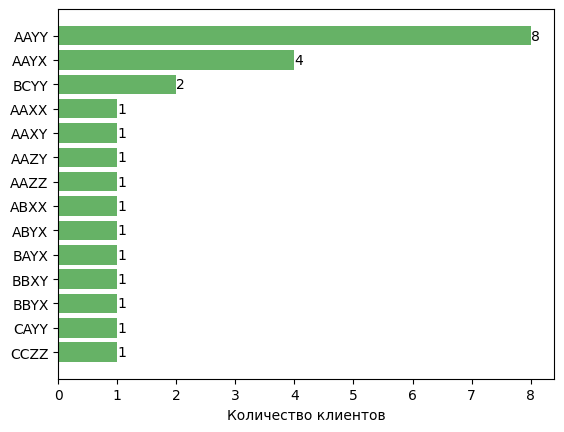

In [ ]:
ax = plt.barh(group_customer['group'],
         group_customer['amount_client'],
         color='green',
         alpha = 0.6)
plt.bar_label(ax)
plt.xlabel('Количество клиентов')
plt.show()

In [ ]:
mask = merged_table.iloc[:, 1:-1].isin({
                  'abc_revenue': ['A', 'B'],
                   'abc_volume': ['A', 'B'],
                   'xyz_revenue': ['X', 'Y'],
                   'xyz_order_volume': ['X', 'Y']
                   }).all(axis=1)

Список топовых или предтоповых клиентов, которых важно сохранять и/или стимулировать к росту.  
Группы A, B по доходу и объему заказов и X, Y стабильности, приносимого дохода и объемов заказа:

In [ ]:
merged_table[mask]['customer']

,customer
0,Karlen McCaffrey
1,Beverie Moffet
2,Dennison Crosswaite
3,Kelci Walkden
4,Oby Sorrel
5,Brien Boise
6,Marney O'Breen
7,Jan Morforth
8,Ches Bonnell
9,Madelene Upcott


In [ ]:
mask = merged_table.loc[:, ['abc_revenue','xyz_revenue']].isin({
    'abc_revenue':['A'],
    'xyz_revenue': ['Z']
}).all(axis=1)

Список пользователей, которые приносят большой вклад в доход (группа А), но не стабильные и слабо прогнозируемые (группа Z).
Следить за их активностью и стимулировать:

In [ ]:
merged_table[mask]['customer']

,customer
15,Van Tuxwell
16,Gunar Cockshoot
